In [13]:

!pip install tensorflow-addons
!unzip "/content/drive/MyDrive/self_supervised2/data/archive.zip"
from google.colab import drive
drive.mount('/content/drive')

Streaming output truncated to the last 5000 lines.
  inflating: tiny-imagenet-200/val/images/val_5501.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5502.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5503.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5504.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5505.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5506.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5507.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5508.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5509.JPEG  
  inflating: tiny-imagenet-200/val/images/val_551.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5510.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5511.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5512.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5513.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5514.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5515.JPEG  
  inflating: tiny-imag

In [3]:
import sys
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


# from dataset import prepare_dataset

from tensorflow.keras.models import Sequential, Model



import tensorflow_addons as tfa
import tensorflow as tf
print(tf.__version__)


import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import pandas as pd
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.activations import *
from tensorflow.keras.metrics import *
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from matplotlib.colors import ListedColormap
from tensorflow.keras import backend as k
import datetime
# import tensorflow_hub as hub
import random
import os
from numpy import save
from numpy import load
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf
# import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from sklearn.metrics import confusion_matrix , accuracy_score , precision_score, recall_score, f1_score

from tensorflow.keras import regularizers
from tqdm import tqdm
import math
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tqdm import tqdm
import tensorflow_datasets as tfds

import h5py


import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
from collections import defaultdict


from sklearn.metrics import mean_squared_error
from scipy.stats import wasserstein_distance


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


2.15.0


In [6]:
shuffle_buffer = 5000
input_shape = (96,96,3)

In [8]:




def get_encoder2():
    base_model = tf.keras.applications.ResNet50(include_top=False,
        weights="imagenet", input_shape=input_shape)
    base_model.trainable = True

    inputs = tf.keras.layers.Input(input_shape)
    x = base_model(inputs, training=True)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(2048, activation='relu', use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    z = tf.keras.layers.Dense(2048)(x)

    f = tf.keras.Model(inputs, z)

    return f



In [9]:
#stl-10
dataset_name = "stl10"
AUTOTUNE = tf.data.AUTOTUNE
shuffle_buffer = 5000


def data_stl(size = 32):

    unlabeled_batch_size = size
    labeled_batch_size = size
    batch_size = size

    D_train = defaultdict(list)
    D_val = defaultdict(list)

    train_dataset = (
        tfds.load(dataset_name, split="train", as_supervised=True, shuffle_files=True)

    )
    test_dataset = (
        tfds.load(dataset_name, split="test", as_supervised=True)
    )

    X_train, y_train = tuple(zip(*train_dataset))

    X_test, y_test = tuple(zip(*test_dataset))

    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_test = np.array(X_test)
    y_test = np.array(y_test)


    for i,j in zip(X_train, y_train):

        if(j >= 0 and j <= 4):

            if(len(D_train[j]) <= 50):


                D_train[j].append(i/255.0)


    for i,j in zip(X_test, y_test):

        if(j >= 0 and j <= 4):

            if(len(D_val[j]) <= 3):



                D_val[j].append(i/255.0)




    return D_train, D_val


In [14]:
#Tiny Imagenet

def process_image(image_path , IMG_SIZE = 96):

  image = tf.io.read_file(image_path)

  image = tf.image.decode_jpeg(image, channels=3)

  image = tf.image.convert_image_dtype(image, tf.float32)

  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image


def get_image_label(image_path, label):

  image = process_image(image_path)
  return image, label


def data_imagenet(batch_size=32,f = True):


    base  = "/content/tiny-imagenet-200/train"

    D_train = defaultdict(list)
    D_val = defaultdict(list)

    files = []
    labels = []
    i = 0
    for p in sorted(os.listdir(base)):

        base2 =  os.path.join(base,p,"images")

        t = []
        t1 = []
        for p2 in sorted(os.listdir(base2)):

            t.append(os.path.join(base2,p2))
            t1.append(i)

        files.append(t)
        labels.append(t1)
        i+=1



    files = np.array(files)
    labels = np.array(labels)


    files = files.flatten()
    labels = labels.flatten()




    print(files.shape)
    print(labels.shape)


    X_train, X_val, y_train, y_val = train_test_split(files,
                                                    labels,
                                                    test_size=0.2,
                                                    random_state=42)




    for i,j in zip(X_train, y_train):

        if(j >= 0 and j <= 4):

            if(len(D_train[j]) <= 50):

                img =  cv2.imread(i,1)

                img = cv2.resize(img, dsize= (96,96), interpolation = cv2.INTER_NEAREST)/255.0

                D_train[j].append(img)


    for i,j in zip(X_val, y_val):

        if(j >= 0 and j <= 4):

            if(len(D_val[j]) <= 3):

                img =  cv2.imread(i,1)

                img = cv2.resize(img, dsize= (96,96), interpolation = cv2.INTER_NEAREST)/255.0

                D_val[j].append(img)




    return D_train, D_val



def data_imagenet2(batch_size=32):


    base  = "/content/tiny-imagenet-200/train"

    D_train = defaultdict(list)
    D_val = defaultdict(list)

    files = []
    labels = []
    i = 0
    for p in sorted(os.listdir(base)):

        base2 =  os.path.join(base,p,"images")

        t = []
        t1 = []
        for p2 in sorted(os.listdir(base2)):

            t.append(os.path.join(base2,p2))
            t1.append(i)

        files.append(t)
        labels.append(t1)
        i+=1



    files = np.array(files)
    labels = np.array(labels)


    files = files.flatten()
    labels = labels.flatten()




    print(files.shape)
    print(labels.shape)


    X_train, X_val, y_train, y_val = train_test_split(files,
                                                    labels,
                                                    test_size=0.2,
                                                    random_state=42)




    for i,j in zip(X_train, y_train):

        if(j >= 0 and j <= 4):

            if(len(D_train[j]) <= 50):


                D_train[j].append(i)


    for i,j in zip(X_val, y_val):

        if(j >= 0 and j <= 4):

            if(len(D_val[j]) <= 3):



                D_val[j].append(i)




    return D_train, D_val




In [19]:

def helper(D_train, D_val,model):

    mse_arr = []
    wasser_arr = []
    kl_qr_arr = []
    kl_rq_arr = []


    for i in tqdm(range(0,5)):


        for j in D_val[i][:1]:

            j_ = np.expand_dims(j, axis = 0)

            quary = model(j_)

            mse_ = []
            wasser_ = []
            kl_qr_ = []
            kl_rq_ = []



            for index, k in enumerate(D_train[i]):

                k_ = np.expand_dims(k, axis = 0)

                ret = model(k_)

                mse = mean_squared_error(quary[0],ret[0])
                wasser = wasserstein_distance(quary[0],ret[0])

                kl_loss_fn = tf.keras.metrics.KLDivergence()
                kl_loss_fn.update_state(quary,ret)

                kqr = kl_loss_fn.result().numpy()

                kl_loss_fn = tf.keras.metrics.KLDivergence()
                kl_loss_fn.update_state(ret,quary)

                krq = kl_loss_fn.result().numpy()

                kl_qr_.append((kqr,index))
                kl_rq_.append((krq,index))



                mse_.append((mse,index))
                wasser_.append((wasser,index))



            mse_.sort()
            wasser_.sort()
            kl_qr_.sort()
            kl_rq_.sort()


            mse_arr.append(mse_)
            wasser_arr.append(wasser_)
            kl_qr_arr.append(kl_qr_)
            kl_rq_arr.append(kl_rq_)






    return mse_arr, wasser_arr, kl_qr_arr, kl_rq_arr










In [15]:
D_train_stl, D_val_stl = data_stl()

In [41]:
D_train_img, D_val_img  = data_imagenet()
D_train_img2, D_val_img2  = data_imagenet2()


(100000,)
(100000,)
(100000,)
(100000,)


In [17]:
model_stl = {
    "nnclr" : "/content/drive/MyDrive/self_supervised/model_nnclr_mark-x-stl.h5",
    "pnnclr" : "/content/drive/MyDrive/self_supervised2/model_pNNCLR_WOB_mark-x_stl.h5"
}

model_imgnet = {
    "nnclr" : '/content/drive/MyDrive/self_supervised2/model_nnclr_mark12_imgnet-v2.h5',
    "pnnclr" :  "/content/drive/MyDrive/self_supervised2/model_pNNCLR_WOB_mark-x_imgnet.h5"
}

In [20]:

model_stl_nnclr =  get_encoder2()


model_stl_nnclr.load_weights(model_stl["nnclr"])


mse_arr_stl_nnclr, wasser_arr_stl_nnclr, kl_qr_arr_stl_nnclr, kl_rq_arr_stl_nnclr = helper(D_train_stl, D_val_stl,model_stl_nnclr)




94765736/94765736 [==============================] - 1s 0us/step


100%|██████████| 5/5 [01:50<00:00, 22.18s/it]


In [21]:

def f(a):

    for  i in range(0,5):

        print("*"*100)
        print()
        print(i)
        print()

        print( "mse_arr: ",  a[0][i][0][0])

        print( "wasser_arr: " , a[1][i][0][0])

        print( "kl_qr: ", a[2][i][0][0])

        print("kl_rq: ",a[3][i][0][0])


        print()
        print("*"*100)
        print()











In [22]:
f([mse_arr_stl_nnclr, wasser_arr_stl_nnclr, kl_qr_arr_stl_nnclr, kl_rq_arr_stl_nnclr])

****************************************************************************************************

0

mse_arr:  0.06200914
wasser_arr:  0.00981020288139689
kl_qr:  429.029
kl_rq:  496.7704

****************************************************************************************************

****************************************************************************************************

1

mse_arr:  0.06635874
wasser_arr:  0.008447149286979538
kl_qr:  518.13513
kl_rq:  506.3343

****************************************************************************************************

****************************************************************************************************

2

mse_arr:  0.06291723
wasser_arr:  0.008551058906675735
kl_qr:  430.6264
kl_rq:  452.1046

****************************************************************************************************

****************************************************************************************************

3

mse_a

In [23]:
model_stl_pnnclr =  get_encoder2()


model_stl_pnnclr.load_weights(model_stl["pnnclr"])


mse_arr_stl_pnnclr, wasser_arr_stl_pnnclr, kl_qr_arr_stl_pnnclr, kl_rq_arr_stl_pnnclr = helper(D_train_stl, D_val_stl,model_stl_pnnclr)


100%|██████████| 5/5 [01:41<00:00, 20.28s/it]


In [24]:
f([mse_arr_stl_pnnclr, wasser_arr_stl_pnnclr, kl_qr_arr_stl_pnnclr, kl_rq_arr_stl_pnnclr])

****************************************************************************************************

0

mse_arr:  0.04600715
wasser_arr:  0.008797581290622247
kl_qr:  352.0304
kl_rq:  400.23352

****************************************************************************************************

****************************************************************************************************

1

mse_arr:  0.04554516
wasser_arr:  0.00900092703201949
kl_qr:  367.18088
kl_rq:  452.11786

****************************************************************************************************

****************************************************************************************************

2

mse_arr:  0.038530864
wasser_arr:  0.007078313941022429
kl_qr:  333.59174
kl_rq:  305.94824

****************************************************************************************************

****************************************************************************************************

3


In [25]:
model_img_nnclr =  get_encoder2()


model_img_nnclr.load_weights(model_imgnet["nnclr"])


mse_arr_img_nnclr, wasser_arr_img_nnclr, kl_qr_arr_img_nnclr, kl_rq_arr_img_nnclr = helper(D_train_img, D_val_img,model_img_nnclr)


100%|██████████| 5/5 [01:22<00:00, 16.58s/it]


In [26]:
f([mse_arr_img_nnclr, wasser_arr_img_nnclr, kl_qr_arr_img_nnclr, kl_rq_arr_img_nnclr])

****************************************************************************************************

0

mse_arr:  0.09548785
wasser_arr:  0.01007263553290727
kl_qr:  850.08923
kl_rq:  738.1725

****************************************************************************************************

****************************************************************************************************

1

mse_arr:  0.087420985
wasser_arr:  0.00878264100313686
kl_qr:  693.19116
kl_rq:  700.8015

****************************************************************************************************

****************************************************************************************************

2

mse_arr:  0.10034405
wasser_arr:  0.010822185587727517
kl_qr:  778.6688
kl_rq:  685.8636

****************************************************************************************************

****************************************************************************************************

3

mse

In [27]:
model_img_pnnclr =  get_encoder2()


model_img_pnnclr.load_weights(model_imgnet["pnnclr"])


mse_arr_img_pnnclr, wasser_arr_img_pnnclr, kl_qr_arr_img_pnnclr, kl_rq_arr_img_pnnclr = helper(D_train_img, D_val_img,model_img_pnnclr)

100%|██████████| 5/5 [01:26<00:00, 17.38s/it]


In [28]:
f([mse_arr_img_pnnclr, wasser_arr_img_pnnclr, kl_qr_arr_img_pnnclr, kl_rq_arr_img_pnnclr ])

****************************************************************************************************

0

mse_arr:  0.04521419
wasser_arr:  0.012389076317418812
kl_qr:  287.70355
kl_rq:  286.71918

****************************************************************************************************

****************************************************************************************************

1

mse_arr:  0.048870392
wasser_arr:  0.01018338754187198
kl_qr:  355.65033
kl_rq:  334.2802

****************************************************************************************************

****************************************************************************************************

2

mse_arr:  0.045203287
wasser_arr:  0.00921153596465274
kl_qr:  281.6743
kl_rq:  280.49152

****************************************************************************************************

****************************************************************************************************

3



In [42]:
def save_img(D_val,arr,base):

    for i in tqdm(range(0,5)):


        for j in D_val[i][:1]:

            path = os.path.join(base, str(i) , "quary-image.pdf" )

            plt.axis('off')
            plt.imshow(j)
            plt.savefig(path, format="pdf")

            for id ,ele in enumerate(arr[i][:5]):

                val,index = ele

                img = D_train_stl[i][index]

                path3 = os.path.join(base, str(i) ,  "retrival-" + str(id) + ".pdf" )

                plt.axis('off')
                plt.imshow(img)
                plt.savefig(path3, format="pdf")


def save_img2(D_val,arr,base):

    for i in tqdm(range(0,5)):


        for j in D_val[i][:1]:

            path = os.path.join(base, str(i) , "quary-image.pdf" )

            plt.axis('off')




            # j_ = cv2.resize(j, dsize= (64,64), interpolation = cv2.INTER_NEAREST)

            j_ = cv2.imread(j,1)

            plt.imshow(j_,aspect='auto')
            plt.savefig(path, format="pdf")

            for id ,ele in enumerate(arr[i][:5]):

                val,index = ele

                img = D_train_img2[i][index]



                img = cv2.imread(img,1)

                # img = cv2.resize(img, dsize= (64,64), interpolation = cv2.INTER_NEAREST)

                path3 = os.path.join(base, str(i) ,  "retrival-" + str(id) + ".pdf" )

                plt.axis('off')
                plt.imshow(img,aspect='auto')
                plt.savefig(path3, format="pdf")













In [38]:
base = "/content/drive/MyDrive/self_supervised2/Results/nnclr/stl"
base2 = "/content/drive/MyDrive/self_supervised2/Results/nnclr/tiny-imagenet"

base3 = "/content/drive/MyDrive/self_supervised2/Results/pnnclr/stl"
base4 = "/content/drive/MyDrive/self_supervised2/Results/pnnclr/tiny-imagenet/"

100%|██████████| 5/5 [00:23<00:00,  4.69s/it]


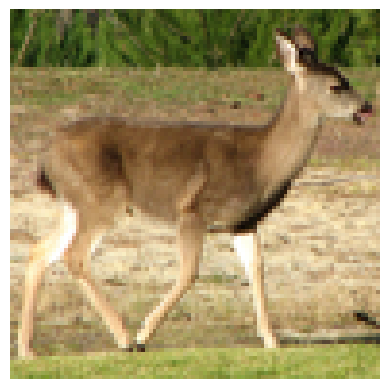

In [39]:
save_img(D_val_stl,mse_arr_stl_nnclr,base)

100%|██████████| 5/5 [00:19<00:00,  3.99s/it]


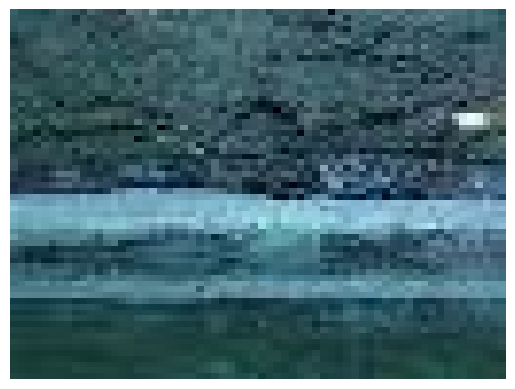

In [43]:
save_img2(D_val_img2,mse_arr_img_nnclr,base2)

100%|██████████| 5/5 [00:22<00:00,  4.46s/it]


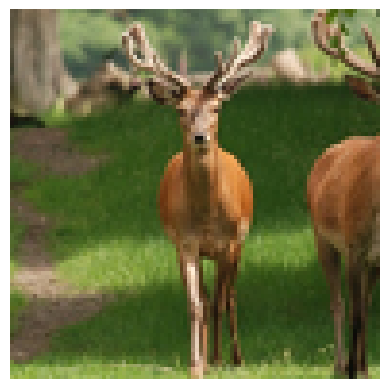

In [44]:
save_img(D_val_stl,mse_arr_stl_pnnclr,base3)

100%|██████████| 5/5 [00:19<00:00,  3.95s/it]


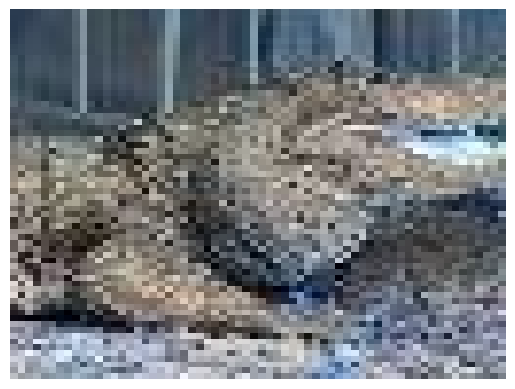

In [45]:
save_img2(D_val_img2,mse_arr_img_pnnclr,base4)